<a href="https://colab.research.google.com/github/selinbilginay/DataScience/blob/main/Feature_Engineering_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=blue>Assignments for "Feature Engineering - Part 2"</font>

In this assignment, you are going to use a dataset related to the US education system. Please download the ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)) from Kaggle. You are going to use `states_all.csv` within this dataset.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
title_font = {'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'color': 'darkblue','weight': 'bold','size': 10 }

In [2]:
states_education=pd.read_csv('/content/states_all.csv')

In [3]:
my_year=[1986,1987,1988,1989,1990,1991,2017,2019]
for year in my_year:
  states_education.drop(states_education[states_education['YEAR']==year].index,axis=0,inplace=True)

In [4]:
states_education.drop('PRIMARY_KEY',axis=1,inplace=True)

In [5]:
states_education.drop(states_education[states_education['STATE']=='NATIONAL'].index,axis=0,inplace=True)

In [6]:
states_education.drop(states_education[states_education['STATE']=='DODEA'].index,axis=0,inplace=True)

In [7]:
print(states_education.shape)
states_education.info()
states_education.columns

(1275, 24)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATE                         1275 non-null   object 
 1   YEAR                          1275 non-null   int64  
 2   ENROLL                        1224 non-null   float64
 3   TOTAL_REVENUE                 1275 non-null   float64
 4   FEDERAL_REVENUE               1275 non-null   float64
 5   STATE_REVENUE                 1275 non-null   float64
 6   LOCAL_REVENUE                 1275 non-null   float64
 7   TOTAL_EXPENDITURE             1275 non-null   float64
 8   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 9   SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 10  OTHER_EXPENDITURE             1224 non-null   float64
 11  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 12  GRADES_PK_G                   1262 non-null   float

Index(['STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE',
       'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE',
       'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
       'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G',
       'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G',
       'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE',
       'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [8]:
for col in states_education.columns:
  for state in states_education.STATE.unique():
    if (col!='YEAR' and col!='STATE'):
      states_education.loc[(states_education['STATE']==state)&(states_education[col].isnull()),col]=states_education[states_education['STATE']==state][col].mean()


In [9]:
states_education.isnull().sum()*100/states_education.shape[0]

STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

In [10]:
states_education.reset_index()

,index,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,0,ALABAMA,1992,7.365843e+05,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,4.613081e+05,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,464653.65,213099.95,731634.0,208.000000,252.000000,207.000000,254.888889
1,1,ALASKA,1992,1.304296e+05,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,5.982192e+04,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,80658.50,39679.95,122487.0,235.857143,281.285714,211.142857,259.285714
2,2,ARIZONA,1992,8.743221e+05,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,3.344099e+05,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,632177.35,298509.95,673477.0,215.000000,265.000000,209.000000,258.111111
3,3,ARKANSAS,1992,4.519019e+05,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,2.537191e+05,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,288069.95,136490.55,441490.0,210.000000,256.000000,211.000000,258.666667
4,4,CALIFORNIA,1992,5.945343e+06,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,2.907487e+06,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3783631.40,1880000.60,5254844.0,208.000000,261.000000,202.000000,253.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,1270,VIRGINIA,2016,1.283493e+06,16259274.0,1058146.0,6297587.0,8903541.0,16497520.0,8944614.0,5164699.0,6.435060e+05,1161323.0,33281.0,90800.0,99258.0,95234.0,90500.0,773615.00,389330.00,1287026.0,239.444444,283.111111,223.909091,267.333333
1271,1271,WASHINGTON,2016,1.083973e+06,14964364.0,1097684.0,9211201.0,4655479.0,15253296.0,7087365.0,4904575.0,5.776060e+05,2204059.0,13933.0,81102.0,86114.0,81039.0,90645.0,667327.00,339349.00,1101711.0,242.714286,286.428571,221.600000,266.666667
1272,1272,WEST_VIRGINIA,2016,2.767640e+05,3391579.0,358068.0,1863062.0,1170449.0,3366566.0,1804235.0,1127255.0,2.364870e+05,181392.0,14949.0,19869.0,20324.0,19931.0,18155.0,159595.00,79442.00,273855.0,230.666667,269.222222,215.727273,258.222222
1273,1273,WISCONSIN,2016,8.577360e+05,11697466.0,782610.0,5986763.0,4928093.0,11787535.0,5760418.0,3691439.0,5.080130e+05,1082849.0,55436.0,57332.0,62408.0,61432.0,66303.0,488983.00,262681.00,864432.0,241.000000,286.000000,222.000000,266.500000


**(1)** Create a variable that contains the weighted average of the grades in the dataset. The number of students in the fourth grade is different from that of the eighth grade. So you will need a weighted average!

In [11]:
states_education['average math grades (weighted)']=((states_education['AVG_MATH_4_SCORE']*states_education['GRADES_4_G'])+(states_education['AVG_MATH_8_SCORE']*states_education['GRADES_8_G']))/(states_education['GRADES_4_G']+states_education['GRADES_8_G'])
states_education['average reading grades (weighted)']=((states_education['AVG_READING_4_SCORE']*states_education['GRADES_4_G'])+(states_education['AVG_READING_8_SCORE']*states_education['GRADES_8_G']))/(states_education['GRADES_4_G']+states_education['GRADES_8_G'])
states_education['average GPA']=(states_education['average math grades (weighted)']+states_education['average reading grades (weighted)'])/2

In [12]:
states_education

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,average math grades (weighted),average reading grades (weighted),average GPA
0,ALABAMA,1992,7.365843e+05,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,4.613081e+05,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,464653.65,213099.95,731634.0,208.000000,252.000000,207.000000,254.888889,230.014607,230.960342,230.487475
1,ALASKA,1992,1.304296e+05,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,5.982192e+04,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,80658.50,39679.95,122487.0,235.857143,281.285714,211.142857,259.285714,257.396319,233.968966,245.682642
2,ARIZONA,1992,8.743221e+05,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,3.344099e+05,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,632177.35,298509.95,673477.0,215.000000,265.000000,209.000000,258.111111,238.480586,232.063154,235.271870
3,ARKANSAS,1992,4.519019e+05,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,2.537191e+05,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,288069.95,136490.55,441490.0,210.000000,256.000000,211.000000,258.666667,233.448976,235.298576,234.373776
4,CALIFORNIA,1992,5.945343e+06,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,2.907487e+06,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3783631.40,1880000.60,5254844.0,208.000000,261.000000,202.000000,253.666667,232.631372,226.011714,229.321543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,VIRGINIA,2016,1.283493e+06,16259274.0,1058146.0,6297587.0,8903541.0,16497520.0,8944614.0,5164699.0,6.435060e+05,1161323.0,33281.0,90800.0,99258.0,95234.0,90500.0,773615.00,389330.00,1287026.0,239.444444,283.111111,223.909091,267.333333,260.826051,245.171993,252.999022
1271,WASHINGTON,2016,1.083973e+06,14964364.0,1097684.0,9211201.0,4655479.0,15253296.0,7087365.0,4904575.0,5.776060e+05,2204059.0,13933.0,81102.0,86114.0,81039.0,90645.0,667327.00,339349.00,1101711.0,242.714286,286.428571,221.600000,266.666667,263.907815,243.449190,253.678502
1272,WEST_VIRGINIA,2016,2.767640e+05,3391579.0,358068.0,1863062.0,1170449.0,3366566.0,1804235.0,1127255.0,2.364870e+05,181392.0,14949.0,19869.0,20324.0,19931.0,18155.0,159595.00,79442.00,273855.0,230.666667,269.222222,215.727273,258.222222,249.756240,236.767313,243.261777
1273,WISCONSIN,2016,8.577360e+05,11697466.0,782610.0,5986763.0,4928093.0,11787535.0,5760418.0,3691439.0,5.080130e+05,1082849.0,55436.0,57332.0,62408.0,61432.0,66303.0,488983.00,262681.00,864432.0,241.000000,286.000000,222.000000,266.500000,263.322674,244.074645,253.698660


**(2)** What is the correlation between the variable you just created and the types of expenditures? Which expenditure item has more correlation than others?

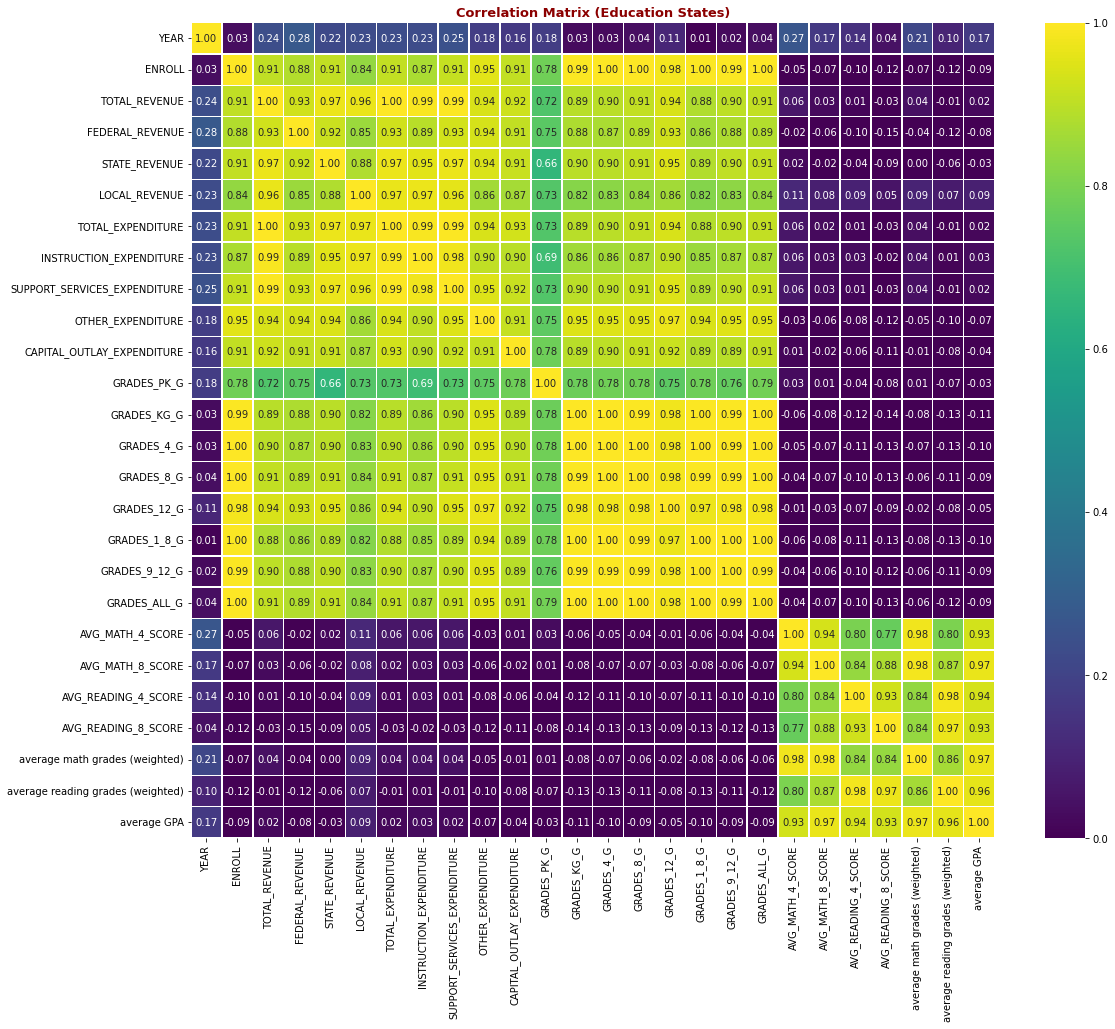

In [13]:
plt.figure(figsize=(18,15))
sns.heatmap(states_education.corr(),annot=True, fmt='.2f', annot_kws={"size": 10}, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix (Education States)",fontdict=title_font)
plt.show()

 - From the heatmap, we can see that expenditures does not have a correlation with our targets which are average math grades(weighted) and average reading grades (weighted).

**(3)** Now apply the Principal Components Analysis (PCA) for the four expenditure items! How much of the total variance can be explained by the first component?

In [50]:
my_expenditure=states_education[['SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE','INSTRUCTION_EXPENDITURE']]

In [51]:
my_values=my_expenditure.values

In [52]:
len(my_expenditure.columns)

4

In [53]:
my_values=StandardScaler().fit_transform(my_expenditure)
pca=PCA(n_components=4)
principalComponents=pca.fit_transform(my_values)

In [54]:
exp_var=pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.9440589  0.03044915 0.02175441 0.00373754]
[ 94.41  97.45  99.63 100.  ]


 - we can see that the first principal component PC1 explains %94.4 of the variation in the original data while the second principal component PC2 explains %3 of the variation in the original data.

Text(0, 0.5, '% of variance explained')

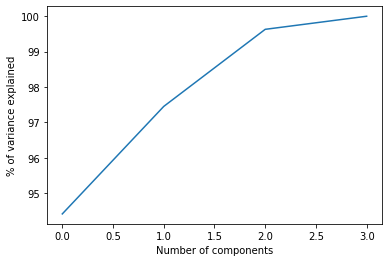

In [55]:
plt.plot(cumsum_var)
plt.xlabel('Number of components')
plt.ylabel('% of variance explained')

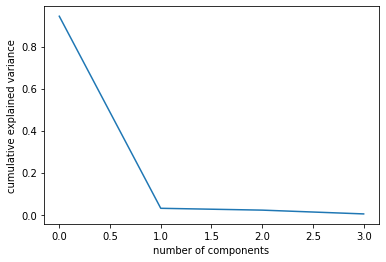

In [56]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

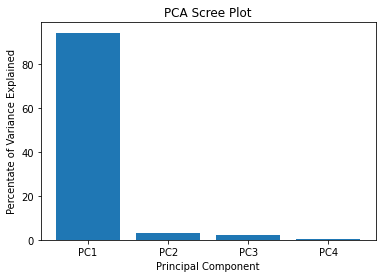

In [57]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2','PC3','PC4']
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [58]:
my_values = pd.DataFrame(my_values, columns=my_expenditure.columns)

In [59]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig = plt.figure(figsize=(12,6), dpi=100)
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

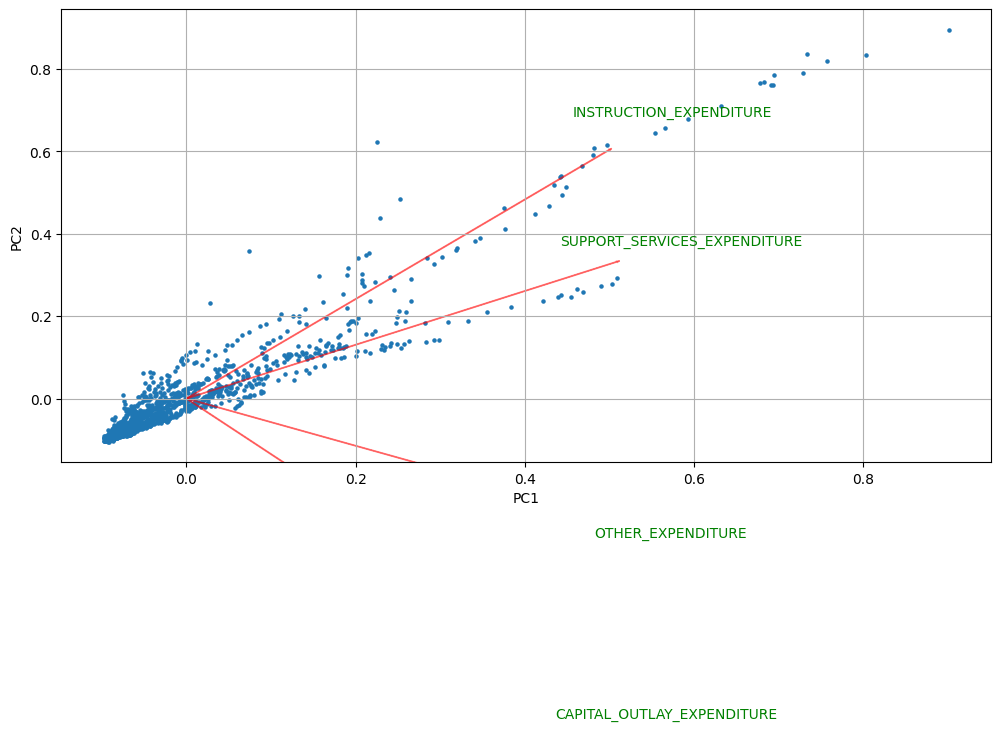

In [60]:
myplot(np.array(my_values)[:,0:2],np.transpose(pca.components_[0:2, :]),list(my_values.columns))
plt.show()

**(4)** What is the correlation between the GPA you created and the first principal component?

- Correlation between the average GPA i created before and the first principal component is 0.03

**(5)** When you need to choose the most appropriate variables for your model, would you prefer the first basic variables instead of the expenditure items? Why?

 - I would continue with expenditure items because PCA results and correlation heatmap results give us that it is best for us to work with expenditure items, specially with instruction expenditure.